In [1]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [2]:
import splitfolders

input_folder = 'C:/Users/Phoni/Downloads/NonsegmentedV2'
output_folder = 'G:/live project/Image Classification/output'

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .0, .2))

Copying files: 5539 files [00:13, 420.74 files/s]


In [3]:
import glob

train_length = 0
test_length = 0

for name in glob.glob('G:/live project/Image Classification/output/train/*'):
  train_length += len(glob.glob(name+'/*.png'))

for name in glob.glob('G:/live project/Image Classification/output/test/*'):
  test_length += len(glob.glob(name+'/*.png'))

print(train_length,test_length)

4426 1113


In [4]:
batch_size = 32
img_height = 120
img_width = 120

In [5]:
data_dir_train = 'G:/live project/Image Classification/output/train/'
data_dir_test = 'G:/live project/Image Classification/output/test'

In [6]:
# creating train dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, validation_split=0.2, subset="training", seed=123,
                                                               image_size=(img_height, img_width), batch_size=batch_size)

Found 9707 files belonging to 11 classes.
Using 7766 files for training.


In [7]:
# creating validation dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, validation_split=0.2, subset="validation", seed=123,
                                                             image_size=(img_height, img_width), batch_size=batch_size)

Found 9707 files belonging to 11 classes.
Using 1941 files for validation.


In [8]:
# Listing out all the classes of plant seedlings and store them in a list.

labels = sorted(os.listdir(data_dir_train))
print(labels)

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherd’s Purse', 'Small-flowered Cranesbill', 'Sugar beet']


In [9]:
# creating a list which counts the number of images in each class of plant seedling
count_plot = []
for i in labels:
    count_plot.append(len(os.listdir(os.path.join(data_dir_train,i))))

In [10]:
count_plot

[248, 362, 269, 571, 203, 431, 610, 206, 486, 220, 461, 371]

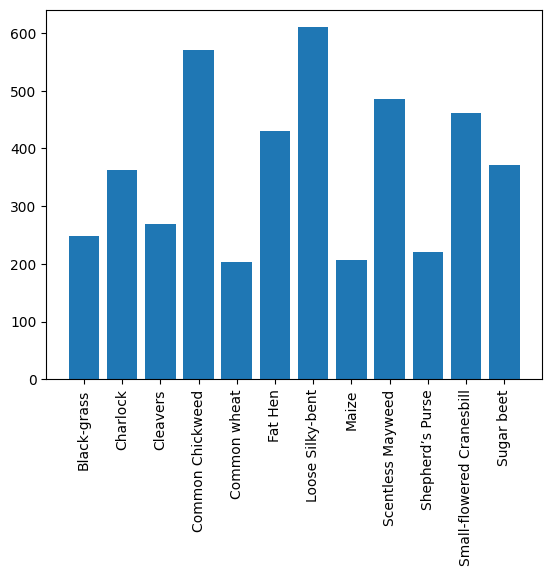

In [11]:
# creating plot for distribution of images in each class
count_plot = np.array(count_plot)
plt.bar(labels, count_plot)
plt.xticks(rotation = 90)
plt.show()

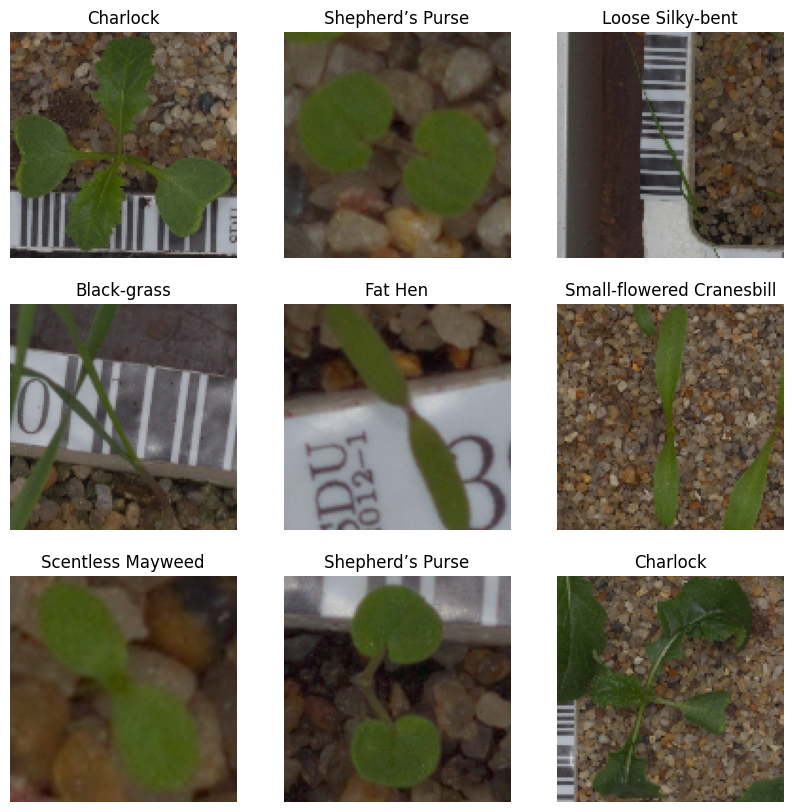

In [12]:
# visualizing few images from the train data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for image, label in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(labels[label[i]])
    plt.axis("off")

In [13]:
# specifying image dimensions with RGB channel
input_shape = (120,120,3)
# storing number of classes of plant seedlings in a variable
num_classes = 12

# creating layers for the first model using conv2D
model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, offset=0.0, input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same'))
model.add(Activation('relu'))
# using batch normalization
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

AttributeError: module 'tensorflow.keras.layers' has no attribute 'experimental'

In [ ]:
### Compiling the model
### choosing an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
### Training the model
epochs = 20
batch_size = 32
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

Epoch 1/20


106/106 [==============================] - 100s 911ms/step - loss: 3.4319 - accuracy: 0.5505 - val_loss: 12.0373 - val_accuracy: 0.1320
Epoch 2/20
106/106 [==============================] - 94s 878ms/step - loss: 0.8296 - accuracy: 0.7510 - val_loss: 25.6525 - val_accuracy: 0.1379
Epoch 3/20
106/106 [==============================] - 91s 855ms/step - loss: 0.6261 - accuracy: 0.8277 - val_loss: 23.9173 - val_accuracy: 0.1391
Epoch 4/20
106/106 [==============================] - 4576s 44s/step - loss: 0.3965 - accuracy: 0.8681 - val_loss: 8.1792 - val_accuracy: 0.1962
Epoch 5/20
106/106 [==============================] - 100s 934ms/step - loss: 0.2345 - accuracy: 0.9150 - val_loss: 2.9193 - val_accuracy: 0.4673
Epoch 6/20
106/106 [==============================] - 110s 1s/step - loss: 0.2414 - accuracy: 0.9192 - val_loss: 1.1134 - val_accuracy: 0.7467
Epoch 7/20
106/106 [==============================] - 117s 1s/step - loss: 0.2138 - accuracy: 0.9293 - val_loss: 1.1024 - val

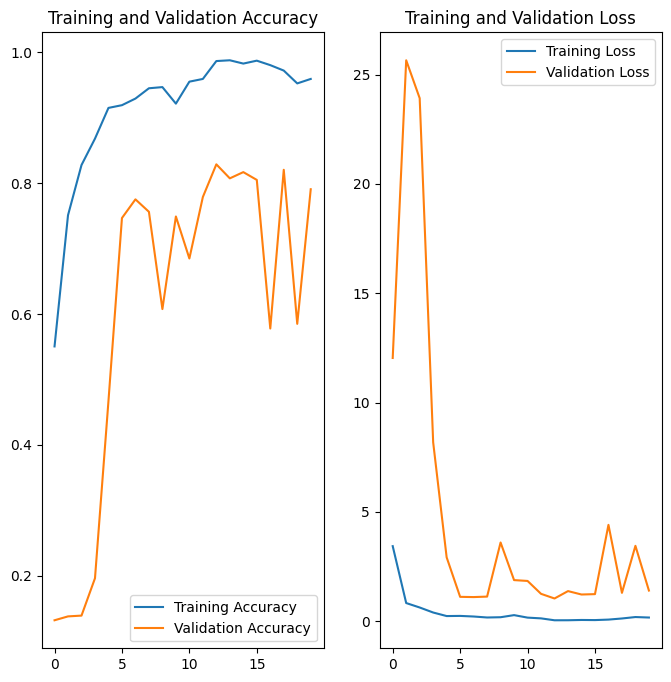

In [ ]:
### visualizing the model results.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()